# Goods Recommandation by the Tompson Sampling-based AI engine

## Declare Packages tu Use 

In [62]:
using Distributions
using Formatting
using Plots
using Zygote
using Random

In [15]:
f(s) = 2s^2 + s + 1
gradient(f, 2)

(9.0,)

## Parameter Initialization

In [64]:
println("Thompson Sampling ===========================")

N = 3
means = rand(N)
println(means)

Thompson Sampling ===========================
[0.6360465213072554, 0.7167933000717239, 0.6147067422655954]


In [65]:
probs = zeros(N)
println(typeof(means), typeof(probs))

Vector{Float64}Vector{Float64}


In [66]:
function display(epoch::Int64, proposal_arm::Int64, probs::Vector{Float64}, disp::Bool=false)
    if disp
        println("Trial $(epoch)")
        for prob ∈ probs
            # println("prob: $(prob)")
            printfmt("prob: {:.2f} ", prob)
        end
        println(" => Max arm: $(proposal_arm)")
    end
end

display (generic function with 2 methods)

## Online Training By Thompson Sampling

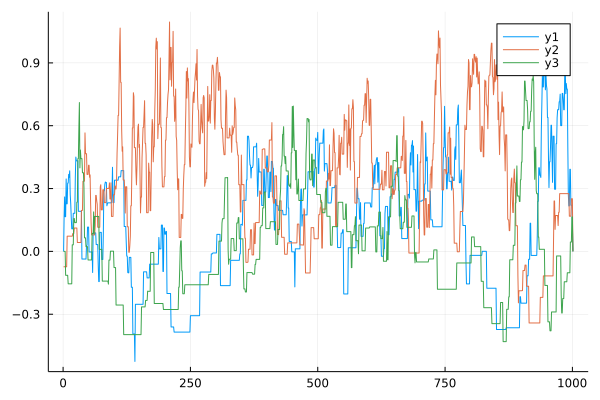

In [68]:
disp = false 
Nepoch = 1000
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
S = zeros(Float64, N)
F = zeros(Float64, N)

function cost_ts(S, F)
    probs = rand.(Normal.(S, F))
    proposal_arm = argmax(probs)
    p = rand(Uniform())
    if p < means[proposal_arm] 
        return (1 - probs[proposal_arm])^2
    else
        return (0 - probs[proposal_arm])^2
    end
end

S_list = zeros(Float64, Nepoch+1, N)
S_list[1,:] = S

μ = 0.1
for epoch in range(1, Nepoch)
    S -= μ * gradient(cost_ts, S)[1]
    S_list[epoch,:] = S
end

plot(range(1,Nepoch+1), S_list)

S is now given by
Int32[0, 34, 1]
F is now given by
Int32[2, 10, 3]


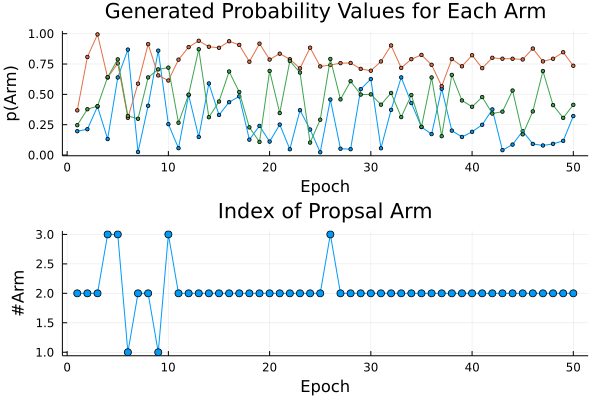

In [8]:
println("S is now given by")
println(S)
println("F is now given by")
println(F)

p1 = plot(probs_array, marker = :circle, markersize = 2, ylabel = "p(Arm)", 
    title = "Generated Probability Values for Each Arm", label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(proposal_arm_array, marker = :circle, ylabel = "#Arm", 
    title = "Index of Propsal Arm", legend = false)

plot(p1, p2, layout = (2,1),  xlabel= "Epoch", legend=false)

## Plotting PDF for Analysis

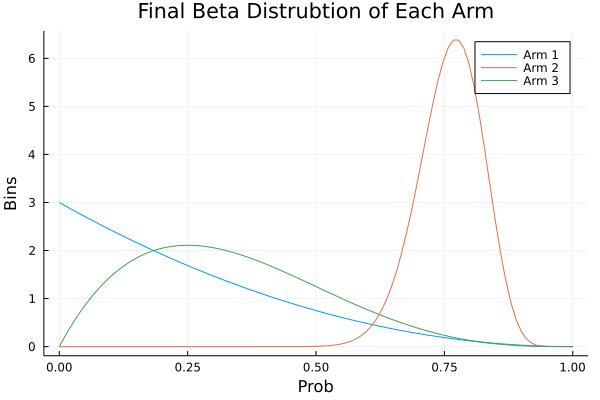

In [9]:
lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Beta(S[i]+1,F[i]+1),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

plot(x, Y, xlabel = "Prob", ylabel = "Bins", title = "Final Beta Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])